# $k$-means vs Gaussian Mixture

The objective of this lab is to compare the performance of two clustering algorithms, $k$-means and Gaussian mixture, on both synthetic and real data.

You will find below Python code for:
* loading data samples either from the Gaussian mixture model (GMM) or from the [iris dataset](https://fr.wikipedia.org/wiki/Iris_de_Fisher)
* clustering these data samples by $k$-means and Gaussian mixture.

## To do

1. Compare the performance of $k$-means and Gaussian mixture in terms of ARI (Adjusted Rand Index).<br> Test various parameters for the GMM, and different values of $k$.
2. Implement a version of Gaussian mixture where the covariance matrices are diagonal (and thus stored as *vectors*) and test its performance. We refer to this algorithm as GMD (GM with Diagonal covariance matrices)
3. Test these three algorithms ($k$-means, GMM and GMD) on data of your choice.

## Import packages

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, metrics

## Synthetic data

In [4]:
def gaussian_samples(mean = 0, std_dev = 1, nb_samples = 1):
    '''Gaussian samples
    
    Parameters
    ----------
    mean: float or array of floats, default: 0
        Mean            
    std_dev: float or array of floats, default: 1
        Standard deviation (covariance = SS^T)
    nb_samples: int
        Number of samples
        
    Returns
    -------
    samples: array of floats of shape (nb_samples,dim)
        Gaussian samples (std_dev * normal_samples + mean)
    '''
        
    mean = np.array(mean)
    std_dev = np.array(std_dev)
    try:
        dim = mean.shape[0]
    except:
        dim = 1
    normal_samples = np.random.normal(size = dim * nb_samples).reshape(dim,nb_samples)
    samples = np.array(std_dev).dot(normal_samples) 
    samples += np.array(mean).reshape(dim,1).dot(np.ones((1,nb_samples)))
    return samples.T

In [5]:
def gmm_samples(means = [0], std_devs = [1], p = None, nb_samples = 1):
    '''Gaussian mixture model samples
    
    Parameters
    ----------
    means: array of floats of shape (nb_modes,dim)
        Means            
    std_dev: array of floats of shape (nb_modes,dim,dim)
        Standard deviations
    p: array of floats of shape (nb_modes)
        Mixing distribution (sums to 1)
    nb_samples: int
        Number of samples
        
    Returns
    -------
    samples: array of floats of shape (nb_samples,dim)
        Gaussian mixture model samples 
    labels: array of integers of shape (nb_samples)
        labels (latent variables)
    '''
    means = np.array(means)
    std_devs = np.array(std_devs)
    nb_labels = means.shape[0]
    try:
        dim = means.shape[1]
    except:
        dim = 1
    labels = np.random.choice(nb_labels, size = nb_samples, p = p)
    samples = np.zeros((nb_samples,dim))
    for j in range(nb_labels):
        nb_samples_j = np.sum(labels == j)
        if nb_samples_j:
            index = np.where(labels == j)[0]
            samples[index] = gaussian_samples(means[j], std_devs[j], nb_samples_j)
    return samples, labels

In [6]:
def show_samples(samples, labels, feature_x = 0, feature_y = 1, display_labels = True):
    '''Display the samples in 2D'''
    if display_labels:
        nb_labels = np.max(labels)
        for j in range(nb_labels + 1):
            nb_samples = np.sum(labels == j)
            if nb_samples:
                index = np.where(labels == j)[0]
                plt.scatter(samples[index,feature_x],samples[index,feature_y])
    else:
        plt.scatter(samples[:,feature_x],samples[:,feature_y],color='gray')
    plt.axis('equal')
    plt.show()

In [7]:
means = [[3,2],[-3,2],[0,-4]]
std_devs = [[[1,0],[0,1]],[[1,0],[0,1]],[[2,0],[0,2]]]
p = [0.25,0.25,0.5]

In [8]:
samples, labels = gmm_samples(means, std_devs, p, 300)

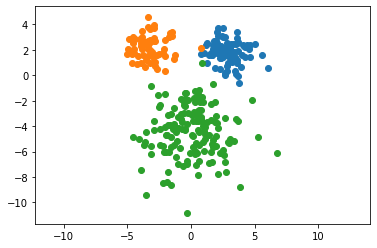

In [9]:
show_samples(samples, labels)

## Real data

In [10]:
iris = datasets.load_iris()
samples = iris.data  
features_names = iris.feature_names
labels = iris.target

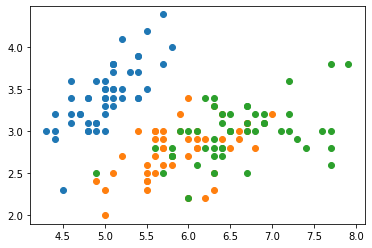

In [11]:
show_samples(samples, labels)

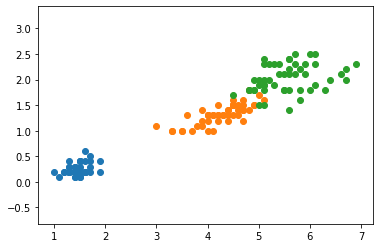

In [12]:
show_samples(samples, labels, 2,3)

## Metrics

In [13]:
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import adjusted_mutual_info_score as ami

## k-means

In [55]:
class KMeans:
    '''k-means algorithm
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init : int, default: 10
        Number of instances of k-means, each with different initial centers. 
        The output is that of the best instance (in terms of inertia).
    
    n_iter: int, default: 300
        Number of iterations for each instance of k-means.
        
    algorithm: "random" or "++", default:"++"
        Algorithm for initializing the centers; "++" corresponds to k-means++.
    
    seed: int, default: None
        Seed for the random generation of initial centers.
        
    verbose: boolean, optional
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample (cluster index).
        
    centers_ : array, shape(n_clusters, n_features)
        Cluster centers.
        
    inertias_: array, shape(n_clusters,)
        Cluster inertias (sum of square distances).
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='++', seed=None, verbose = False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.centers_ = None
        self.inertias_ = None
       
    def fit(self, X):
        '''Cluster data X using k-means
    
        Parameters
        ----------
        X: array, shape(n_samples,n_features)
            Data to cluster.
        '''        
        
        def init_centers(self, X):
            if self.algorithm == 'random':
                # random centers 
                samples = np.random.choice(X.shape[0], size = self.n_clusters)
                centers = X[samples]
            else:
                # k-means++
                centers = []
                centers.append(X[np.random.randint(X.shape[0])])
                distance = np.full(X.shape[0], np.inf)
                for j in range(1,self.n_clusters):
                    distance = np.minimum(np.linalg.norm(X - centers[-1], axis=1), distance)
                    p = np.square(distance) / np.sum(np.square(distance))
                    sample = np.random.choice(X.shape[0], p = p)
                    centers.append(X[sample])
            return centers
        
        def compute_centers(self, X, labels):
            centers = []
            for j in range(self.n_clusters):
                index = np.where(labels == j)[0]
                if len(index):
                    centers.append(np.mean(X[index],axis = 0))
                else:
                    # reinit center in case of empty cluster
                    centers.append(X[np.random.choice(X.shape[0])])
            return centers

        def compute_distances(self, X, centers):
            distances = []
            for j in range(self.n_clusters):
                distances.append(np.linalg.norm(X - centers[j], axis=1))
            return np.array(distances)
            
        def compute_inertias(self, X, labels, centers):
            inertias = []
            for j in range(self.n_clusters):
                index = np.where(labels == j)[0]
                inertias.append(np.sum(np.square(np.linalg.norm(X[index] - centers[j], axis=1))))
            return np.array(inertias)
    
        def one_kmeans(self, X):
            centers = init_centers(self, X)
            for i in range(self.n_iter):
                centers_old = centers.copy()
                distances = compute_distances(self, X, centers)
                labels = np.argmin(distances, axis=0)  
                centers = compute_centers(self, X, labels)
                if np.array_equal(centers, centers_old):
                    break
            inertias = compute_inertias(self, X, centers, labels)
            return labels, centers, inertias
            
        np.random.seed(self.seed)
        best_inertia = None
        # select the best instance of k-means
        for i in range(self.n_init):
            if self.verbose:
                print("Instance ",i)
            labels, centers, inertias = one_kmeans(self, X)
            inertia = np.sum(inertias)
            if best_inertia is None or inertia < best_inertia:
                best_labels = labels.copy()
                best_centers = centers.copy()
                best_inertias = inertias.copy()
                best_inertia = inertia

        self.labels_ = best_labels
        self.centers_ = best_centers
        self.inertias_ = best_inertias
        return self

In [56]:
km = KMeans(n_clusters = 3)

In [57]:
km.fit(samples)

In [58]:
ari(labels, km.labels_) 

0.7302382722834697

In [59]:
ami(labels, km.labels_) 

0.7551191675800484

In [60]:
# Normalization
min_samples = samples.min(axis = 0)
max_samples = samples.max(axis = 0)
norm_samples = (samples - min_samples) / (max_samples - min_samples)

In [61]:
km.fit(norm_samples)

In [62]:
ari(labels, km.labels_) 

0.7163421126838475

In [63]:
ami(labels, km.labels_) 

0.7386548254402863

## Gaussian mixture

In [30]:
class GMM:
    '''EM algorithm for the Gaussian mixture model
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init : int, default: 10
        Number of instances of the algorithm, each with different initial cluster centers. 
        The output is that of the best instance (in terms of likelihood).
    
    n_iter: int, default: 300
        Maximum number of iterations for each instance of the algorithm.
        
    algorithm: "random" or "k-means++", default:"k-means++"
        Algorithm for initializing the means.
    
    seed: int, default: None
        Seed for the random generation of cluster centers.
        
    verbose: boolean, default: True
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample (cluster index).

    label_probs_: array, shape(n_samples,n_clusters)
        Probability distribution of labels for each sample.
        
    centers_ : array, shape(n_clusters,n_features)
        Cluster centers.
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='k-means++', seed=None, verbose=True):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.label_probs_ = None
        self.centers_ = None
       
    def fit(self, X):
        '''Cluster data X using EM for the Gaussian mixture model
    
        Parameters
        ----------
        X: array, shape(n_samples,n_features)
            Data to cluster.
        '''        
        
        def init_parameters(self, X):
            # choose initial centers
            if self.algorithm == 'random':
                # random centers
                samples = np.random.choice(X.shape[0], size = self.n_clusters)
                centers = X[samples]
            else:
                # k-means++
                centers = []
                centers.append(X[np.random.randint(X.shape[0])])
                distance = np.full(X.shape[0], np.inf)
                for j in range(1,self.n_clusters):
                    distance = np.minimum(np.linalg.norm(X - centers[-1], axis=1), distance)
                    p = np.square(distance) / np.sum(np.square(distance))
                    sample = np.random.choice(X.shape[0], p = p)
                    centers.append(X[sample])
                
            # estimate the parameters from the induced clusters
            distances = []
            for j in range(self.n_clusters):
                distances.append(np.linalg.norm(X - centers[j], axis=1))
            labels = np.argmin(np.array(distances), axis=0)
            means = []
            covariances = []
            mixing_weights = []
            for j in range(self.n_clusters):
                index = np.where(labels == j)[0]
                mixing_weights.append(len(index))
                if len(index):
                    means.append(np.mean(X[index], axis = 0))
                    covariances.append(np.cov(X[index].T))    
                else:
                    means.append(centers[j])
                    covariances.append(np.eye(X.shape[1]))
            return np.array(means), np.array(covariances), np.array(mixing_weights)

        def compute_label_probs(self, X, means, covariances, mixing_weights):
            label_probs = np.zeros((X.shape[0],self.n_clusters))
            for j in range(self.n_clusters):
                cov = covariances[j]
                try:
                    inv_cov = np.linalg.inv(cov)
                    square_distances = ((X - means[j]).dot(inv_cov) * (X - means[j])).sum(axis = 1) 
                    label_probs[:,j] = np.exp(-square_distances / 2) / np.sqrt(np.linalg.det(cov))
                except:
                    if self.verbose:
                        print("Warning: Singular covariance matrix")
                    square_distances = np.square(X - means[j]).sum(axis = 1) 
                    label_probs[:,j] = np.exp(-square_distances / 2) 
            label_probs = label_probs * mixing_weights
            label_probs = (label_probs.T / label_probs.sum(axis = 1)).T
            return label_probs    
                        
        def compute_parameters(self, X, label_probs):
            mixing_weights = label_probs.sum(axis = 0)
            means = (X.T.dot(label_probs) / mixing_weights).T
            covariances = []
            for j in range(self.n_clusters):
                Y = (X - means[j]).T * label_probs[:,j]
                covariances.append(Y.dot(X - means[j]) / mixing_weights[j])
            return means, covariances, mixing_weights
        
        def compute_log_likelihood(self, X, means, covariances, mixing_weights):
            likelihoods = np.zeros((X.shape[0],self.n_clusters))
            total_weight = mixing_weights.sum()
            for j in range(self.n_clusters):
                cov = covariances[j]
                try:
                    inv_cov = np.linalg.inv(cov)
                    square_distances = ((X - means[j]).dot(inv_cov) * (X - means[j])).sum(axis = 1) 
                    likelihoods[:,j] = mixing_weights[j] / total_weight * np.exp(-square_distances / 2) / np.sqrt(np.linalg.det(cov))
                except:
                    if self.verbose:
                        print("Warning: Singular covariance matrix")
                    square_distances = np.square(X - means[j]).sum(axis = 1) 
                    likelihoods[:,j] = mixing_weights[j] / total_weight * np.exp(-square_distances / 2) 
            return np.log(likelihoods.sum(axis = 1)).sum()
    
        def single_run_EM(self, X):
            means, covariances, mixing_weights = init_parameters(self, X)
            labels = -np.ones(X.shape[0])
            for i in range(self.n_iter):    
                # Expectation
                label_probs = compute_label_probs(self, X, means, covariances, mixing_weights)              
                if np.array_equal(labels, label_probs.argmax(axis = 1)):
                    break
                else:
                # Maximization
                    means, covariances, mixing_weights = compute_parameters(self, X, label_probs)
                    labels = label_probs.argmax(axis = 1)
            return label_probs, means, covariances, mixing_weights
            
        np.random.seed(self.seed)
        best_loglikelihood = None
        # select the best instance of EM
        for i in range(self.n_init):
            if self.verbose:
                print("Instance ",i)               
            label_probs, means, covariances, mixing_weights = single_run_EM(self, X)
            loglikelihood = compute_log_likelihood(self, X, means, covariances, mixing_weights)
            if best_loglikelihood is None or loglikelihood > best_loglikelihood:
                best_loglikelihood = loglikelihood
                best_label_probs = label_probs
                best_labels = label_probs.argmax(axis = 1)
                best_centers = means
        self.label_probs_ = best_label_probs
        self.labels_ = best_labels
        self.centers_ = best_centers
        return self

In [31]:
gmm = GMM(n_clusters = 3)

In [32]:
gmm.fit(samples)

Instance  0
Instance  1
Instance  2
Instance  3
Instance  4
Instance  5
Instance  6
Instance  7
Instance  8
Instance  9


In [33]:
ari(labels, gm.labels_)

0.9410122562924206

In [34]:
ami(labels, gm.labels_)

0.9182207443266877

## Diagonal covariance matrices

In [71]:
class GMD:
    '''EM algorithm for the Gaussian mixture model with diagonal covariance matrices
    
    Parameters
    ----------
    n_clusters: int, default: 8
        Number of clusters.
    
    n_init : int, default: 10
        Number of instances of the algorithm, each with different initial cluster centers. 
        The output is that of the best instance (in terms of inertia).
    
    n_iter: int, default: 300
        Maximum number of iterations for each instance of the algorithm.
        
    algorithm: "random" or "k-means++", default:"k-means++"
        Algorithm for initializing the means.
    
    seed: int, default: None
        Seed for the random generation of cluster centers.
        
    verbose: boolean, default: True
        Verbose mode.
    
    Attributes
    ----------
    labels_: array, shape(n_samples,)
        Label of each sample.

    label_probs_: array, shape(n_samples,n_clusters)
        Distribution of each sample over labels.
        
    centers_ : array, shape(n_clusters,n_features)
        Cluster centers.
    '''

    def __init__(self, n_clusters=8, n_init=10, n_iter=300, algorithm='k-means++', seed=None, verbose=True):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.algorithm = algorithm
        self.seed = seed
        self.verbose = verbose
        self.labels_ = None
        self.label_probs_ = None
        self.centers_ = None
       
    def fit(self, X):
        '''Cluster data X using EM for the Gaussian mixture model
    
        Parameters
        ----------
        X: array, shape(n_samples,n_features)
            Data to cluster.
        '''        
        
        def init_parameters(self, X):
            # choose initial centers
            if self.algorithm == 'random':
                # random centers
                samples = np.random.choice(X.shape[0], size = self.n_clusters)
                centers = X[samples]
            else:
                # k-means++
                centers = []
                centers.append(X[np.random.randint(X.shape[0])])
                distance = np.full(X.shape[0], np.inf)
                for j in range(1,self.n_clusters):
                    distance = np.minimum(np.linalg.norm(X - centers[-1], axis=1), distance)
                    p = np.square(distance) / np.sum(np.square(distance))
                    sample = np.random.choice(X.shape[0], p = p)
                    centers.append(X[sample])
            # estimate the parameters from the induced clusters
            distances = []
            for j in range(self.n_clusters):
                distances.append(np.linalg.norm(X - centers[j], axis=1))
            clusters = np.argmin(np.array(distances), axis=0)
            means = []
            variances = []
            mixing_weights = []
            for j in range(self.n_clusters):
                index = np.where(clusters == j)[0]
                mixing_weights.append(len(index))
                if len(index):
                    means.append(np.mean(X[index], axis = 0))
                    variances.append(np.var(X[index],axis = 0))    
                else:
                    means.append(centers[j])
                    variances.append(np.ones(X.shape[1]))
            return means, variances, mixing_weights

        def compute_label_probs(self, X, means, variances, mixing_weights):
            label_probs = np.zeros((X.shape[0],self.n_clusters))
            for j in range(self.n_clusters):
                square_distances = ((X - means[j]) / variances[j] * (X - means[j])).sum(axis = 1) 
                label_probs[:,j] = np.exp(-square_distances / 2) / np.sqrt(np.prod(variances[j]))
            label_probs = label_probs * np.array(mixing_weights)
            label_probs = (label_probs.T / label_probs.sum(axis = 1)).T
            return label_probs    
                        
        def compute_parameters(self, X, label_probs):
            mixing_weights = label_probs.sum(axis = 0)
            means = (X.T.dot(label_probs) / mixing_weights).T
            variances = []
            for j in range(self.n_clusters):
                if mixing_weights[j]:
                    variances.append(np.average(np.square(X - means[j]), axis = 0, weights = label_probs[:,j]))
                else:
                    variances.append(np.ones(X.shape[1]))
            return means, variances, mixing_weights
        
        def compute_log_likelihood(self, X, means, variances, mixing_weights):
            likelihoods = np.zeros((X.shape[0],self.n_clusters))
            total_weight = np.array(mixing_weights).sum()
            for j in range(self.n_clusters):
                square_distances = ((X - means[j]) / variances[j] * (X - means[j])).sum(axis = 1) 
                likelihoods[:,j] = mixing_weights[j] / total_weight * np.exp(-square_distances / 2) / np.sqrt(np.prod(variances[j]))
            return np.log(likelihoods.sum(axis = 1)).sum()
    
        def single_run_EM(self, X):
            means, variances, mixing_weights = init_parameters(self, X)
            labels = -np.ones(X.shape[0])
            for i in range(self.n_iter):    
                # Expectation
                label_probs = compute_label_probs(self, X, means, variances, mixing_weights)              
                if np.array_equal(labels, label_probs.argmax(axis = 1)):
                    break
                else:
                # Maximization
                    means, variances, mixing_weights = compute_parameters(self, X, label_probs)
                    labels = label_probs.argmax(axis = 1)
            return label_probs, means, variances, mixing_weights
            
        np.random.seed(self.seed)
        best_loglikelihood = None
        # select the best instance of EM
        for i in range(self.n_init):
            if self.verbose:
                print("Instance ",i)               
            label_probs, means, variances, mixing_weights = single_run_EM(self, X)
            loglikelihood = compute_log_likelihood(self, X, means, variances, mixing_weights)
            if best_loglikelihood is None or loglikelihood > best_loglikelihood:
                best_loglikelihood = loglikelihood
                best_label_probs = label_probs
                best_labels = label_probs.argmax(axis = 1)
                best_centers = means
        self.label_probs_ = best_label_probs
        self.labels_ = best_labels
        self.centers_ = best_centers
        return self

In [72]:
gmd = GMD(n_clusters = 3)

In [73]:
gmd.fit(samples)

Instance  0
Instance  1
Instance  2
Instance  3
Instance  4
Instance  5
Instance  6
Instance  7
Instance  8
Instance  9


In [75]:
ari(labels, gmd.labels_)

0.7591987071071522

In [76]:
ami(labels, gmd.labels_)

0.8032287370935431